# Chapter 2: Optimization: Principles and Algorithms

Consider $f:\mathbb{R}^2 \to \mathbb{R}$ defined as \\[f(x)= \frac{1}{2} x_1^2 + 2 x_2^2\\]

It corresponds to the example 2.14 in the book 
Bierlaire (2015) Optimization: principles and algorithms, EPFL Press.

Its gradient is \\[ \nabla f(x) = \left(\begin{array}{c}x_1 \\ 4 x_2 \end{array}\right)\\]

In [30]:
import numpy as np
def ex0214(x):
    f = 0.5 * x[0] * x[0] + 2.0 * x[1] * x[1]
    g = np.array([x[0], 4.0 * x[1]])
    h = None
    return f, g, h

Evaluate the function at \\[ x = \left(\begin{array}{c}1 \\ 1 \end{array}\right)\\]

In [2]:
x = np.array([1, 1])
f, g = ex0214(x)

In [3]:
print(f)

2.5


In [4]:
print(g)

[1. 4.]


In order to plot the function, we do not need the gradient. 
Therefore, we wrap the above function in another function fct 
that returns only the value of the function.

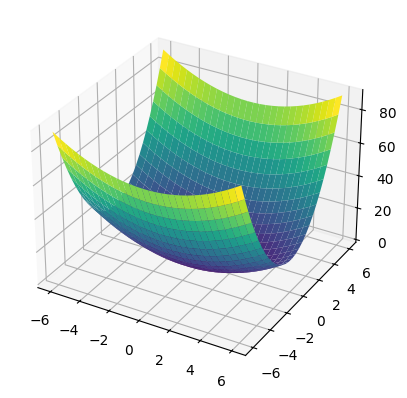

In [5]:
def fct(x, y):
    f, g = ex0214(np.array([x, y]))
    return f

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
meshx = np.linspace(-6, 6, 30)
meshy = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(meshx, meshy)
Z = fct(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

We investigate the shape of the function along several directions.
We define three directions.

In [6]:
d1 = -g
d2 = np.array([-1, -1])
d3 = np.array([1, -3])

We plot the function along the three directions

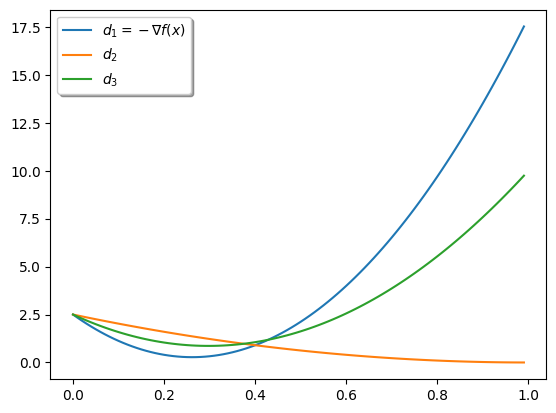

In [9]:
plotalpha = np.arange(0, 1, 0.01)
fig, ax = plt.subplots()
fx1 = np.array([ex0214(x + alpha * d1)[0] for alpha in plotalpha])
fx2 = np.array([ex0214(x + alpha * d2)[0] for alpha in plotalpha])
fx3 = np.array([ex0214(x + alpha * d3)[0] for alpha in plotalpha])
plot1, plot2, plot3 = plt.plot(plotalpha,
                               fx1,
                               plotalpha,
                               fx2,
                               plotalpha,
                               fx3)
ax.legend((plot1,plot2,plot3),
          ('$d_1=-\\nabla f(x)$', '$d_2$', '$d_3$'), \
              loc='upper left', shadow=True)

Calculate the directional derivatives of $f$ at $x$ along each direction.

Along d1: -17.0 

Along d2: -5.0

Along d3: -11.0

Graphical visualization of above problem

In [29]:
ex0214(x0)

(2.5,
 array([1., 4.]),
 array([[1., 0.],
        [0., 4.]]))

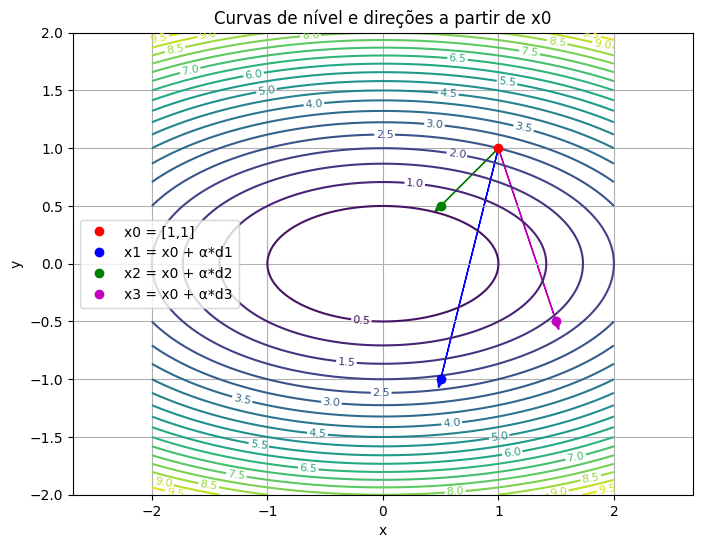

In [31]:
# Parameters
x0 = np.array([1.0, 1.0])
_, g, _ = ex0214(x0)
alpha = 0.5

# Directions
d1 = -g
d2 = np.array([-1.0, -1.0])
d3 = np.array([1.0, -3.0])

# New points after step
x1 = x0 + alpha * d1
x2 = x0 + alpha * d2
x3 = x0 + alpha * d3

# Grid for contour plot
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 0.5 * X**2 + 2.0 * Y**2

# Plotting
plt.figure(figsize=(8, 6))
contours = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)

# Plot initial and resulting points
plt.plot(x0[0], x0[1], 'ro', label='x0 = [1,1]')
plt.plot(x1[0], x1[1], 'bo', label='x1 = x0 + α*d1')
plt.plot(x2[0], x2[1], 'go', label='x2 = x0 + α*d2')
plt.plot(x3[0], x3[1], 'mo', label='x3 = x0 + α*d3')

# Arrows for directions
plt.arrow(x0[0], x0[1], alpha * d1[0], alpha * d1[1], color='b', head_width=0.05)
plt.arrow(x0[0], x0[1], alpha * d2[0], alpha * d2[1], color='g', head_width=0.05)
plt.arrow(x0[0], x0[1], alpha * d3[0], alpha * d3[1], color='m', head_width=0.05)

plt.title('Curvas de nível e direções a partir de x0')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

Example 2.23 (Curvature). The curvature of the function in different directions is given below


In [13]:
def ex0214(x):
    f = 0.5 * x[0] * x[0] + 2.0 * x[1] * x[1]
    g = np.array([x[0], 4.0 * x[1]])
    h = np.array([[1.0, 0.0], [0.0, 4.0]])
    return f, g, h

x = np.array([1, 1])
f, g, h = ex0214(x)

In [24]:
d = np.array([1, 4])
(d @ h @ d) / (d @ d)

-3.823529411764706

In [25]:
d = np.array([1,1])
(d @ h @ d) / (d @ d)

-2.5

In [26]:
d = np.array([-1,3])
(d @ h @ d) / (d @ d)

-3.7

Example 2.31 (Conditioning). The quadratic function

In [36]:
def ex0231(x):
    f = 2.0*x[0]**2 + 9.0*x[1]**2
    g = np.array([4.0*x[0], 18.0*x[1]])
    h = np.array([[4.0, 0.0], [0.0, 18.0]])
    return f, g, h
x0 = np.array([0., 0.])
_, _, h = ex0231(x0)

In [37]:
# Compute the singular values
singular_values = np.linalg.svd(h, compute_uv=False)

# Compute the condition number as sigma_1 / sigma_n
condition_number = singular_values[0] / singular_values[-1]
condition_number

4.5

In [38]:
# Applying change of variables
def ex0231_b(x):
    f = 0.5*x[0]**2 + 0.5*x[1]**2
    g = np.array([1.0*x[0], 1.0*x[1]])
    h = np.array([[1.0, 0.0],[0.0, 1.0]])
    return f, g, h

_, _, h = ex0231_b(x0)
singular_values = np.linalg.svd(h, compute_uv=False)
condition_number = singular_values[0] / singular_values[-1]
condition_number

1.0

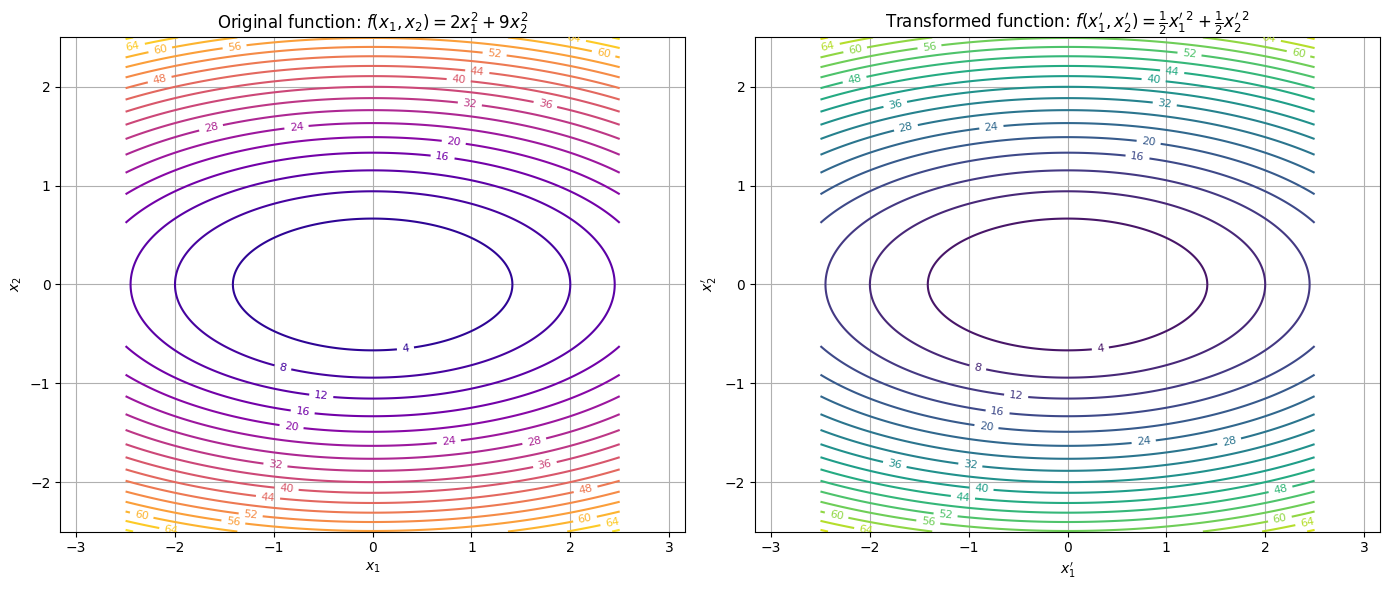

In [42]:
# Original function
def f_original(x1, x2):
    return 2.0 * x1**2 + 9.0 * x2**2

# Transformed function (after variable substitution)
def f_transformed(x1p, x2p):
    return 0.5 * x1p**2 + 0.5 * x2p**2

# Grid for plotting
x_vals = np.linspace(-2.5, 2.5, 400)
y_vals = np.linspace(-2.5, 2.5, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# Original function contours
Z_orig = f_original(X, Y)

# Change of variables
X1p = 2 * X
X2p = 3 * np.sqrt(2) * Y

# Transformed function contours
Z_transf = f_transformed(X1p, X2p)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Original
cs1 = axs[0].contour(X, Y, Z_orig, levels=20, cmap='plasma')
axs[0].clabel(cs1, inline=True, fontsize=8)
axs[0].set_title("Original function: $f(x_1, x_2) = 2x_1^2 + 9x_2^2$")
axs[0].set_xlabel('$x_1$')
axs[0].set_ylabel('$x_2$')
axs[0].axis('equal')
axs[0].grid(True)

# Transformed
cs2 = axs[1].contour(X, Y, Z_transf, levels=20, cmap='viridis')
axs[1].clabel(cs2, inline=True, fontsize=8)
axs[1].set_title("Transformed function: $f(x_1', x_2') = \\frac{1}{2}x_1'^2 + \\frac{1}{2}x_2'^2$")
axs[1].set_xlabel("$x_1'$")
axs[1].set_ylabel("$x_2'$")
axs[1].axis('equal')
axs[1].grid(True)

plt.tight_layout()
plt.show()

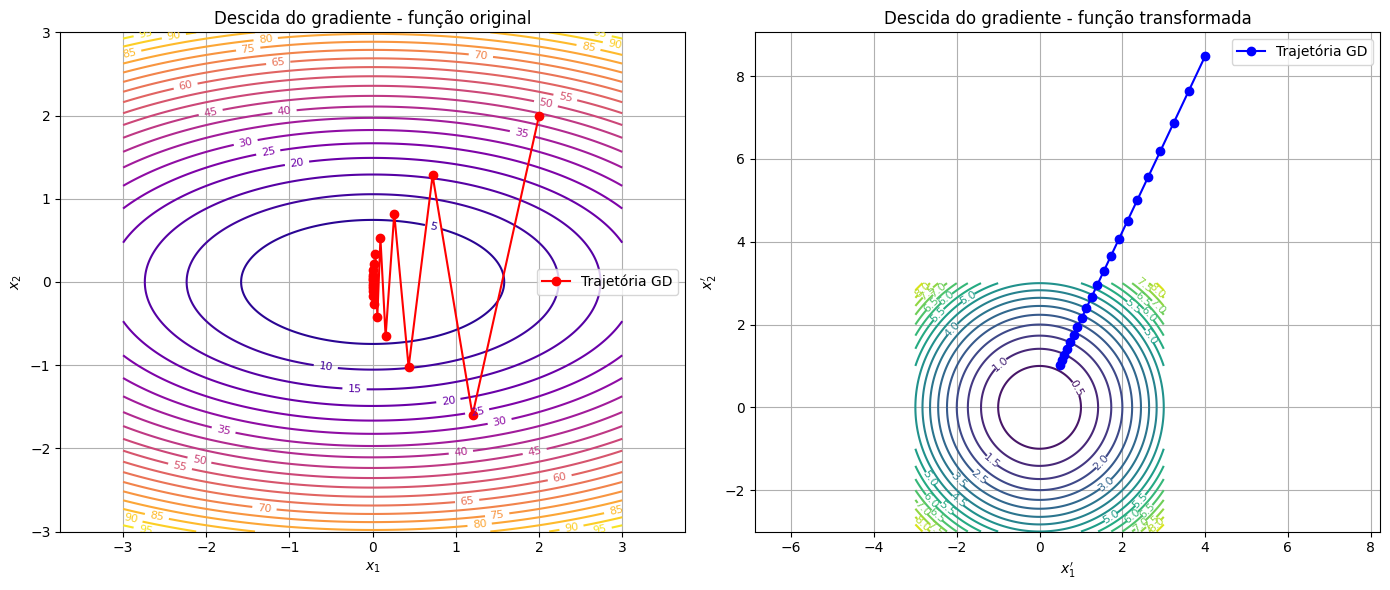

In [43]:
# Ponto inicial
x0 = np.array([2.0, 2.0])  # mesmo ponto de partida nos dois casos
alpha = 0.1  # passo fixo
n_steps = 20  # número de iterações

# Gradiente da função original
def grad_f_original(x):
    return np.array([4.0 * x[0], 18.0 * x[1]])

# Caminho de gradiente descendente para função original
x_orig = [x0.copy()]
x = x0.copy()
for _ in range(n_steps):
    x = x - alpha * grad_f_original(x)
    x_orig.append(x.copy())
x_orig = np.array(x_orig)

# Mudança de coordenadas: x' = T x
T = np.array([[2.0, 0.0], [0.0, 3.0 * np.sqrt(2)]])
T_inv = np.linalg.inv(T)

# Caminho transformado: em coordenadas x'
x0p = T @ x0
def grad_f_transf(xp):
    return np.array([xp[0], xp[1]])  # gradiente da função esférica 0.5 x'^T x'

x_transf = [x0p.copy()]
x = x0p.copy()
for _ in range(n_steps):
    x = x - alpha * grad_f_transf(x)
    x_transf.append(x.copy())
x_transf = np.array(x_transf)

# Curvas de nível para plotagem
x_vals = np.linspace(-3, 3, 400)
y_vals = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z_orig = f_original(X, Y)
Z_transf = f_transformed(X, Y)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Original
cs1 = axs[0].contour(X, Y, Z_orig, levels=20, cmap='plasma')
axs[0].clabel(cs1, inline=True, fontsize=8)
axs[0].plot(x_orig[:, 0], x_orig[:, 1], 'ro-', label='Trajetória GD')
axs[0].set_title("Descida do gradiente - função original")
axs[0].set_xlabel('$x_1$')
axs[0].set_ylabel('$x_2$')
axs[0].legend()
axs[0].axis('equal')
axs[0].grid(True)

# Transformada
cs2 = axs[1].contour(X, Y, Z_transf, levels=20, cmap='viridis')
axs[1].clabel(cs2, inline=True, fontsize=8)
axs[1].plot(x_transf[:, 0], x_transf[:, 1], 'bo-', label='Trajetória GD')
axs[1].set_title("Descida do gradiente - função transformada")
axs[1].set_xlabel("$x_1'$")
axs[1].set_ylabel("$x_2'$")
axs[1].legend()
axs[1].axis('equal')
axs[1].grid(True)

plt.tight_layout()
plt.show()


Consider $f:\mathbb{R}^2 \to \mathbb{R}$ defined as \\[f(x)= \frac{1}{3} x_1^3 +x_2^3-x_1-x_2.\\]

It corresponds to the second function in Exercise 2.2 in the book.

Its gradient is \\[ \nabla f(x) = \left(\begin{array}{c}x_1^2-1 \\ 3 x_2^2-1 \end{array}\right).\\]

Its hessian is \\[ \nabla^2 f(x) = \left( \begin{array}{cc} 2 x_1 & 0 \\ 0 & 6 x_2\end{array}\right).\\]

In [44]:
import numpy as np
def ex(x):
    f = x[0]**3 / 3 + x[1]**3 - x[0] - x[1]
    g = np.array([ x[0] * x[0] - 1, 3 * x[1] * x[1] - 1])
    h = np.array([[2 * x[0], 0], [0, 6 * x[1]]])
    return f, g, h

Evaluate the function at \\[ x = \left(\begin{array}{c}9 \\ 1 \end{array}\right).\\]

In [45]:
x = np.array([9, 1])
f, g, h = ex(x)

In [46]:
print(f)

234.0


In [47]:
print(g)

[80  2]


In [48]:
print(h)

[[18  0]
 [ 0  6]]


To plot the function, we first import the libraries.

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

Then we write a wrapper that returns only the value of the function.

In [50]:
def fplot(x, y):
    npx = np.array([x, y])
    return ex(npx)[0]

Finally, we plot the function for a range of values of $x_1$ and $x_2$.

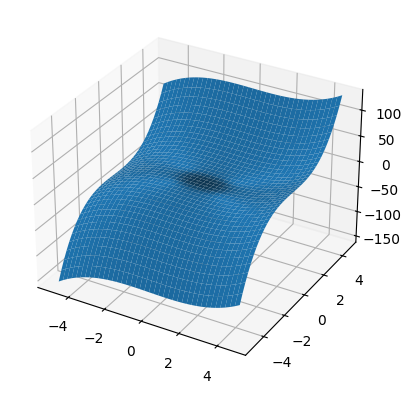

In [51]:
x1 = np.arange(-5, 5, 0.25)
x2 = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(x1, x2)
Z = np.array([[fplot(x, y) for x in x1] for y in x2])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)

Consider the direction \\[ d = \left(\begin{array}{c} -1 \\ -1 \end{array} \right), \\]
and \\[ g(\alpha) = f(x+ \alpha d),\\] the one-dimensional function from $x$ along $d$.

In [52]:
d = np.array([-1, -1])
def onedimension(alpha):
    thex = x + alpha * d
    return ex(thex)[0]

Plot that function.

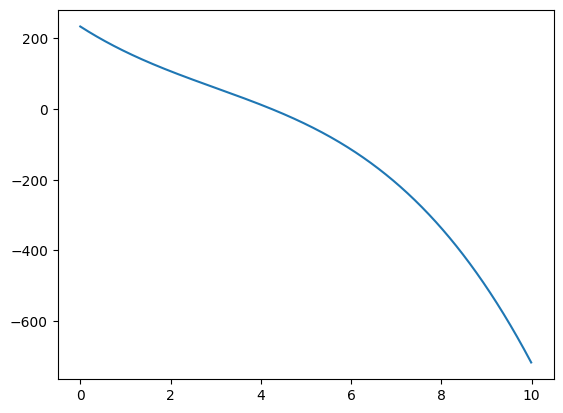

In [53]:
plotalpha = np.arange(0, 10, 0.01)
fx = np.array([onedimension(alpha) for alpha in plotalpha])
plt.plot(plotalpha, fx)

The directional derivative is $\nabla f(x)^T d$, where $x = \left(\begin{array}{c}9 \\ 1 \end{array}\right).$

In [54]:
print(np.inner(g, d))

-82


The curvature is \\[\frac{d^T H d}{d^T d},\\] where $x = \left(\begin{array}{c}9 \\ 1 \end{array}\right).$

In [55]:
def curvature(h, d):
    return np.inner(d, h @ d) / np.inner(d, d)

In [56]:
print(curvature(h, d))

12.0


Calculate the eigenvalues and eigenvectors.

In [57]:
from numpy import linalg as LA
eigenvalues, eigenvectors = LA.eig(h)
eigenvalues


array([18.,  6.])

In [58]:
eigenvectors

array([[1., 0.],
       [0., 1.]])

The curvature along the eigenvectors are the eigenvalues.

In [59]:
print(curvature(h, eigenvectors[0]))
print(curvature(h, eigenvectors[1]))

18.0
6.0


**------- Exercicio Avaliativo: Exercicio 2.2 do livro pagina 50 -----------------**

 Questão 4: \\[f(x)= x_1^2 +2x_1x_2+2x_2^2\\]

Calculando Gradiente: 
\\[ \nabla f(x) = \begin{bmatrix} 2x_1 + 2x_2 \\ 2x_1 + 4x_2\end{bmatrix}\\]


Calculando hessian: \\[ \nabla^2 f(x) = \left( \begin{array}{cc} 2 & 2 \\ 2 & 4\end{array}\right).\\]

In [138]:
import numpy as np
def ex(x):
    f = x[0]**2 + 2*x[0]*x[1] + x[1]**2
    g = np.array([ 2*x[0] + 2*x[1] , 2*x[0] + 4*x[1] ])    
    h = np.array([  [2, 2], [2, 4]  ])
    return f, g, h

Avaliar a função em: \\[ x = \left(\begin{array}{c}1 \\ 1 \end{array}\right).\\]

In [139]:
x = np.array([1, 1])
f, g, h = ex(x)

In [140]:
print(f)

4


In [141]:
print(g)

[4 6]


In [142]:
print(h)

[[2 2]
 [2 4]]


Plotando a Funçao

In [143]:
#Importando Bliotecas

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

In [144]:
#Wrapper para retornar a função

def fplot(x, y):
    npx = np.array([x, y])
    return ex(npx)[0]

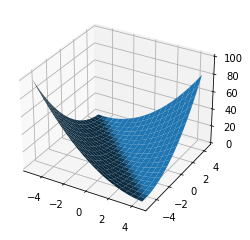

In [145]:
# Plotando a função para intervalos entre x1 e x2

x1 = np.arange(-5, 5, 0.5)
x2 = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(x1, x2)
Z = np.array([[fplot(x, y) for x in x1] for y in x2])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)

Considerando a direção como o vetor negativo do gradiente : \\[ d = \left(\begin{array}{c} 1 \\ 2 \end{array} \right), \\]
e \\[ g(\alpha) = f(x+ \alpha d),\\] a função unidimensional de $x$ ao longo $d$.

In [161]:
d = np.array([1, 2])
def onedimension(alpha):
    thex = x + alpha * d
    return ex(thex)[0]

Plotando a Função:

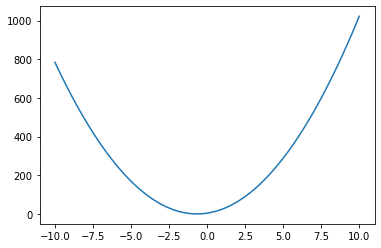

In [162]:
plotalpha = np.arange(-10, 10, 0.01)
fx = np.array([onedimension(alpha) for alpha in plotalpha])
plt.plot(plotalpha, fx)

A derivada direcional é $\nabla f(x)^T d$, onde $x = \left(\begin{array}{c}1 \\ 1 \end{array}\right).$

In [163]:
print(np.inner(g, d))

16


A curva é \\[\frac{d^T H d}{d^T d},\\] onde $x = \left(\begin{array}{c}1 \\ 1 \end{array}\right).$

In [164]:
def curvature(h, d):
    return np.inner(d, h @ d) / np.inner(d, d)

In [165]:
print(curvature(h, d))

5.2


Calcular os autovalores e autovetores:

In [166]:
from numpy import linalg as LA
eigenvalues, eigenvectors = LA.eig(h)
eigenvalues

array([0.76393202, 5.23606798])

In [167]:
eigenvectors

array([[-0.85065081, -0.52573111],
       [ 0.52573111, -0.85065081]])

A curvatura ao longo dos autovetores são os autovalores:

In [168]:
print(curvature(h, eigenvectors[0]))
print(curvature(h, eigenvectors[1]))

4.341640786499873
1.6583592135001266


--------------------------------------------------------------------------

 Questão 5: \\[f(x)= x_1^2 - x_1x_2 + 2x_2^2 - 2x_1 + e^{x_1+x_2}\\]

Calculando Gradiente: 
\\[ \nabla f(x) = \begin{bmatrix} 2x_1 - x_2 - 2 + e^{x_1+x_2} \\ -x_1 + 4x_2 + e^{x_1+x_2}\end{bmatrix}\\]

Calculando hessian: \\[ \nabla^2 f(x) = \left( \begin{array}{cc} 2 + e^{x_1+x_2} & -1 + e^{x_1+x_2} \\ -1 + e^{x_1+x_2} & 4 + e^{x_1+x_2}\end{array}\right).\\]

In [174]:
import numpy as np
def ex(x):
    f = x[0]**2 - x[0]*x[1] + 2*x[1]**2 - 2*x[0] + np.exp(x[0]+x[1])
    g = np.array([ 2*x[0] - x[1] - 2 + np.exp(x[0]+x[1]) , -x[0] + 4*x[1] + np.exp(x[0]+x[1]) ])    
    h = np.array([  [2 + np.exp(x[0]+x[1]), -1 + np.exp(x[0]+x[1])], [-1 + np.exp(x[0]+x[1]), 4 + np.exp(x[0]+x[1])]  ])
    return f, g, h

Avaliar a função em: \\[ x = \left(\begin{array}{c}0 \\ 0 \end{array}\right).\\]

In [175]:
x = np.array([0, 0])
f, g, h = ex(x)

In [176]:
print(f)

1.0


In [177]:
print(g)

[-1.  1.]


In [178]:
print(h)

[[3. 0.]
 [0. 5.]]


Plotando a Funçao

In [179]:
#Wrapper para retornar a função

def fplot(x, y):
    npx = np.array([x, y])
    return ex(npx)[0]

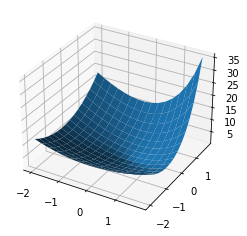

In [180]:
# Plotando a função para intervalos entre x1 e x2

x1 = np.arange(-2, 2, 0.25)
x2 = np.arange(-2, 2, 0.25)
X, Y = np.meshgrid(x1, x2)
Z = np.array([[fplot(x, y) for x in x1] for y in x2])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)

Considerando a direção como o vetor negativo do gradiente : \\[ d = \left(\begin{array}{c} -1 \\ 0 \end{array} \right), \\]
e \\[ g(\alpha) = f(x+ \alpha d),\\] a função unidimensional de $x$ ao longo $d$.

In [189]:
d = np.array([-1, 0])
def onedimension(alpha):
    thex = x + alpha * d
    return ex(thex)[0]

Plotando a Função:

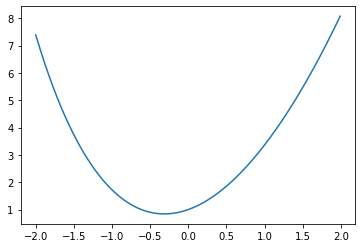

In [193]:
plotalpha = np.arange(-2, 2, 0.01)
fx = np.array([onedimension(alpha) for alpha in plotalpha])
plt.plot(plotalpha, fx)

A derivada direcional é $\nabla f(x)^T d$, onde $x = \left(\begin{array}{c}0 \\ 0 \end{array}\right).$

In [183]:
print(np.inner(g, d))

1.0


A curva é \\[\frac{d^T H d}{d^T d},\\] onde $x = \left(\begin{array}{c}0 \\ 0 \end{array}\right).$

In [184]:
def curvature(h, d):
    return np.inner(d, h @ d) / np.inner(d, d)

In [185]:
print(curvature(h, d))

3.0


Calcular os autovalores e autovetores:

In [186]:
from numpy import linalg as LA
eigenvalues, eigenvectors = LA.eig(h)
eigenvalues

array([3., 5.])

In [187]:
eigenvectors

array([[1., 0.],
       [0., 1.]])

A curvatura ao longo dos autovetores são os autovalores:

In [188]:
print(curvature(h, eigenvectors[0]))
print(curvature(h, eigenvectors[1]))

3.0
5.0
